## Exploring Data

In [1]:
import pandas as pd

mcdonalds = pd.read_csv("mcdonalds.csv") 

print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [2]:
print(mcdonalds.shape)

(1453, 15)


In [3]:
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [4]:
import numpy as np

MD_x = mcdonalds.iloc[:, :11]

MD_x = (MD_x == "Yes").astype(int)

col_means = np.round(MD_x.mean(), 2)

print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Extracting results
std_dev = np.sqrt(pca.explained_variance_)  # Standard deviation of each PC
prop_var = np.round(pca.explained_variance_ratio_, 5)  # Proportion of variance
cum_var = np.round(np.cumsum(prop_var), 5)  # Cumulative proportion

pca_summary = pd.DataFrame({
    "Standard Deviation": np.round(std_dev, 5),
    "Proportion of Variance": prop_var,
    "Cumulative Proportion": cum_var
}, index=[f"PC{i+1}" for i in range(len(std_dev))])

print(pca_summary.to_string())

      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1              0.75705                 0.29945                0.29945
PC2              0.60746                 0.19280                0.49225
PC3              0.50462                 0.13305                0.62530
PC4              0.39880                 0.08310                0.70840
PC5              0.33741                 0.05948                0.76788
PC6              0.31027                 0.05030                0.81818
PC7              0.28970                 0.04385                0.86203
PC8              0.27512                 0.03955                0.90158
PC9              0.26525                 0.03676                0.93834
PC10             0.24884                 0.03235                0.97069
PC11             0.23690                 0.02932                1.00001


In [8]:
pca = PCA()
MD_pca = pca.fit(MD_x)

std_dev = np.round(np.sqrt(pca.explained_variance_), 1)  # Standard deviations rounded to 1 decimal
rotation_matrix = np.round(pca.components_.T, 2)  # Rotation matrix (loadings)

# Create DataFrame for rotation (loadings)
feature_names = MD_x.columns  # Column names of original data
pc_names = [f"PC{i+1}" for i in range(rotation_matrix.shape[1])]

rotation_df = pd.DataFrame(rotation_matrix, index=feature_names, columns=pc_names)

print("Standard deviations (1, .., p=11):")
print(std_dev)

print("\nRotation (n x k) = (11 x 11):")
print(rotation_df.to_string())

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation (n x k) = (11 x 11):
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy       0.48 -0.36  0.30  0.06  0.31 -0.17 -0.28 -0.01 -0.57  0.11 -0.05
convenient  0.16 -0.02  0.06 -0.14 -0.28  0.35 -0.06  0.11  0.02  0.67  0.54
spicy       0.01 -0.02  0.04  0.20 -0.07  0.36  0.71 -0.38 -0.40  0.08 -0.14
fattening  -0.12  0.03  0.32 -0.35  0.07  0.41 -0.39 -0.59  0.16  0.01 -0.25
greasy     -0.30  0.06  0.80  0.25 -0.36 -0.21  0.04  0.14  0.00 -0.01 -0.00
fast        0.11  0.09  0.06 -0.10 -0.11  0.59 -0.09  0.63 -0.17 -0.24 -0.34
cheap       0.34  0.61  0.15  0.12  0.13  0.10 -0.04 -0.14 -0.08 -0.43  0.49
tasty       0.47 -0.31  0.29 -0.00  0.21  0.08  0.36  0.07  0.64 -0.08 -0.02
expensive  -0.33 -0.60 -0.02  0.07  0.00  0.26 -0.07 -0.03 -0.07 -0.45  0.49
healthy     0.21 -0.08 -0.19  0.76 -0.29  0.18 -0.35 -0.18  0.19  0.04 -0.16
disgusting -0.37  0.14  0.09  0.37  0.73 

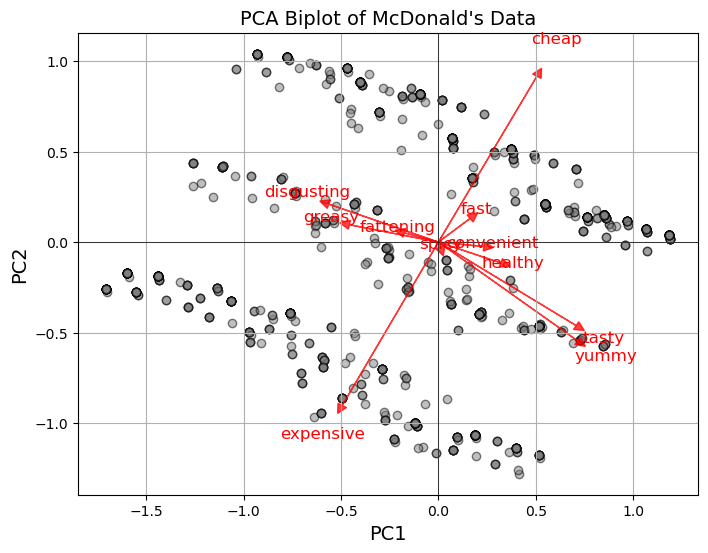

In [10]:
import matplotlib.pyplot as plt

# Project the original data onto the principal components (scores)
pca_scores = MD_pca.transform(MD_x)

# Get the principal component loadings (rotation matrix)
loadings = pca.components_.T

# Define scaling factor for arrows (to match R visualization)
scaling_factor = 1.5  # Adjust to control arrow length

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(pca_scores[:, 0], pca_scores[:, 1], color="grey", alpha=0.5, edgecolors='black', label="Data Points")

for i, feature in enumerate(MD_x.columns):
    ax.arrow(0, 0, scaling_factor * loadings[i, 0], scaling_factor * loadings[i, 1],
             color="red", alpha=0.75, head_width=0.05, head_length=0.05)
    ax.text(scaling_factor * loadings[i, 0] * 1.2, scaling_factor * loadings[i, 1] * 1.2,
            feature, color="red", fontsize=12, ha="center")

ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_title("PCA Biplot of McDonald's Data", fontsize=14)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid()

plt.show()

## Extracting Segments

### Using k-Means

In [11]:
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(1234)

k_range = range(2, 9)

kmeans_models = {}

# Run k-means for each k (with 10 repetitions)
for k in k_range:
    best_model = None
    best_inertia = np.inf  # Track the best model (lower inertia is better)
    
    for _ in range(10):  # 10 repetitions for each k
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=np.random.randint(10000))
        kmeans.fit(MD_x)
        
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_model = kmeans

    kmeans_models[k] = best_model 

# Extract cluster labels for the best k-means models
cluster_labels = {k: kmeans_models[k].labels_ for k in kmeans_models}

for k, labels in cluster_labels.items():
    print(f"Cluster Labels for k={k}:")
    print(labels, "\n")

Cluster Labels for k=2:
[1 0 0 ... 0 0 1] 

Cluster Labels for k=3:
[1 0 0 ... 0 2 1] 

Cluster Labels for k=4:
[2 1 1 ... 1 0 3] 

Cluster Labels for k=5:
[2 1 0 ... 0 4 3] 

Cluster Labels for k=6:
[3 2 5 ... 5 1 0] 

Cluster Labels for k=7:
[4 1 0 ... 0 5 3] 

Cluster Labels for k=8:
[7 5 5 ... 2 3 4] 



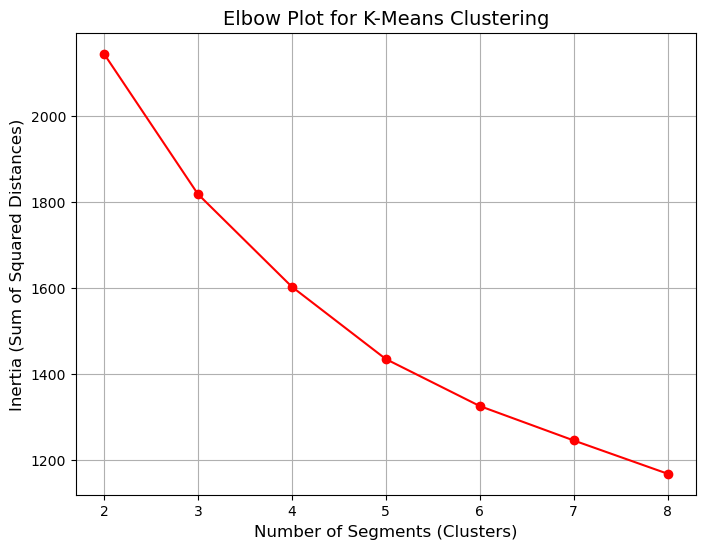

In [12]:
# Extract inertia values (sum of squared distances to cluster centers) for each k
inertia_values = [kmeans_models[k].inertia_ for k in kmeans_models]

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(list(kmeans_models.keys()), inertia_values, marker="o", linestyle="-", color="red")

plt.xlabel("Number of Segments (Clusters)", fontsize=12)
plt.ylabel("Inertia (Sum of Squared Distances)", fontsize=12)
plt.title("Elbow Plot for K-Means Clustering", fontsize=14)
plt.grid()

plt.show()

Bootstrap Stability Scores (first few rows):
          2         3         4         5         6         7         8
0  0.002698  0.000657  0.003750 -0.000917 -0.000597  0.000530  0.002946
1 -0.003245  0.002014  0.000017 -0.001907 -0.000536 -0.002157  0.002757
2  0.007659 -0.000298 -0.001867  0.002275 -0.001181 -0.000434 -0.000285
3  0.003756  0.000148  0.001785 -0.001382 -0.001353 -0.001407  0.000876
4  0.000937  0.003510  0.000479 -0.000525 -0.000199 -0.000895 -0.000221


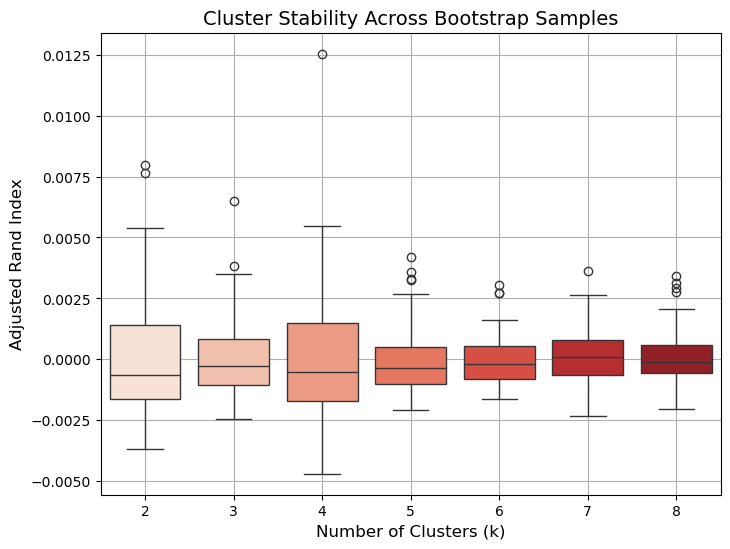

In [14]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)

k_range = range(2, 9)  
n_bootstraps = 100     
n_reps = 10            

bootstrap_scores = {k: [] for k in k_range}

# Bootstrapping procedure
for k in k_range:
    best_model = kmeans_models[k]  # Use previously computed best model
    original_labels = best_model.labels_
    
    for _ in range(n_bootstraps):
        # Bootstrap resampling of data
        boot_sample = resample(MD_x, random_state=np.random.randint(10000))
        
        # Fit new k-means model on bootstrap sample
        kmeans = KMeans(n_clusters=k, n_init=n_reps, random_state=np.random.randint(10000))
        kmeans.fit(boot_sample)
        
        # Compute adjusted Rand index to measure stability
        score = adjusted_rand_score(original_labels, kmeans.labels_)
        bootstrap_scores[k].append(score)

bootstrap_results_df = pd.DataFrame(bootstrap_scores)

print("Bootstrap Stability Scores (first few rows):")
print(bootstrap_results_df.head())

plt.figure(figsize=(8, 6))
sns.boxplot(data=bootstrap_results_df, palette="Reds")
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Adjusted Rand Index", fontsize=12)
plt.title("Cluster Stability Across Bootstrap Samples", fontsize=14)
plt.grid()

plt.show()

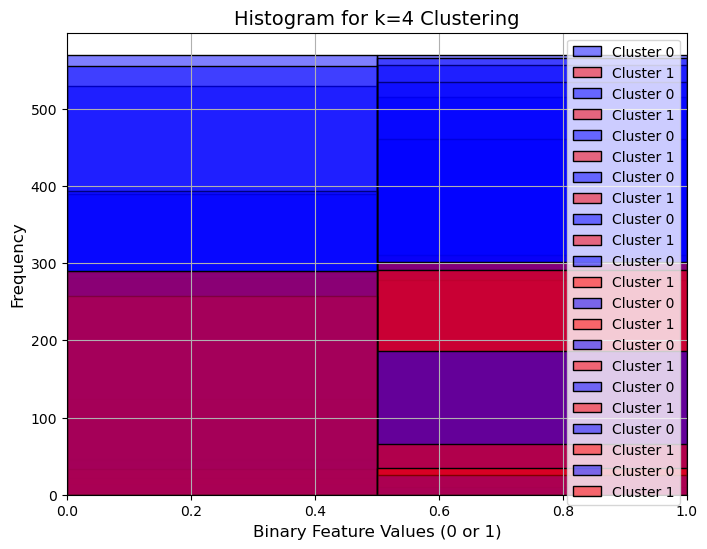

In [15]:
selected_k = 4
cluster_labels = kmeans_models[selected_k].labels_


plt.figure(figsize=(8, 6))
for col in MD_x.columns:
    sns.histplot(MD_x[col][cluster_labels == 0], bins=2, color="blue", alpha=0.5, label="Cluster 0")
    sns.histplot(MD_x[col][cluster_labels == 1], bins=2, color="red", alpha=0.5, label="Cluster 1")

# Customize the plot
plt.xlabel("Binary Feature Values (0 or 1)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(f"Histogram for k={selected_k} Clustering", fontsize=14)
plt.xlim(0, 1)
plt.legend()
plt.grid()

plt.show()

In [17]:
# Extract k-means clustering results for k=4
MD_k4 = kmeans_models[4]  # Extract the k=4 model

# Get cluster assignments (equivalent to MD.k4$cluster in R)
cluster_labels_k4 = MD_k4.labels_

print("Cluster assignments for k=4:")
print(cluster_labels_k4)

Cluster assignments for k=4:
[2 1 1 ... 1 0 3]


Overall Silhouette Score for k=4: 0.2571
Adjusted Rand Index (ARI) for k=4: 1.0000


/var/folders/wx/2q3k_n_948z25v22yh31_1dm0000gn/T/ipykernel_56392/2749511809.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=MD_r4["Cluster"], y=MD_r4["Silhouette Score"], palette="coolwarm")


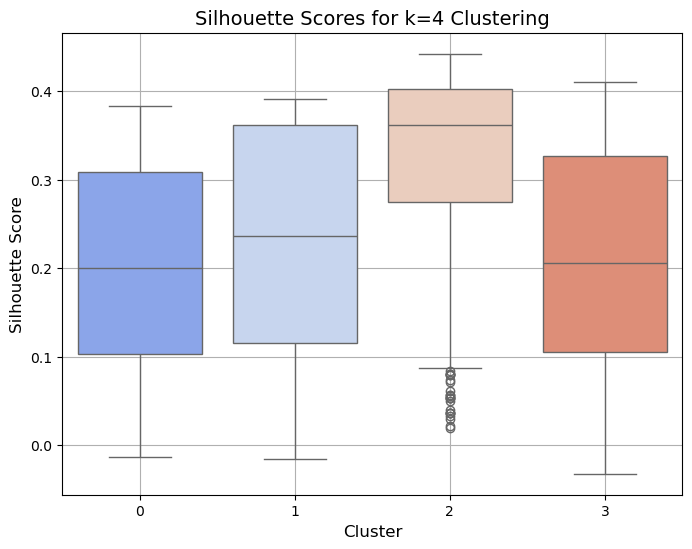

   Cluster  Silhouette Score
0        0          0.108162
1        3          0.050523
2        3          0.125029
3        2          0.151571
4        0          0.217191


In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score

MD_x = mcdonalds.iloc[:, :11]  # Select the first 11 columns
MD_x = (MD_x == "Yes").astype(int)  # Convert "Yes" to 1, "No" to 0

kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
cluster_labels_k4 = kmeans_4.fit_predict(MD_x)

# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(MD_x, cluster_labels_k4)

# Compute the overall silhouette score (measure of clustering quality)
silhouette_avg = silhouette_score(MD_x, cluster_labels_k4)

# Compute Adjusted Rand Index (ARI) for cluster stability (compares original vs assigned clusters)
ari_score = adjusted_rand_score(cluster_labels_k4, kmeans_4.predict(MD_x))

# Create a DataFrame to store silhouette scores per cluster
MD_r4 = pd.DataFrame({'Cluster': cluster_labels_k4, 'Silhouette Score': silhouette_vals})

# Display results
print(f"Overall Silhouette Score for k=4: {silhouette_avg:.4f}")
print(f"Adjusted Rand Index (ARI) for k=4: {ari_score:.4f}")

# Plot silhouette score distribution per cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x=MD_r4["Cluster"], y=MD_r4["Silhouette Score"], palette="coolwarm")
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Scores for k=4 Clustering", fontsize=14)
plt.grid()

plt.show()

print(MD_r4.head())

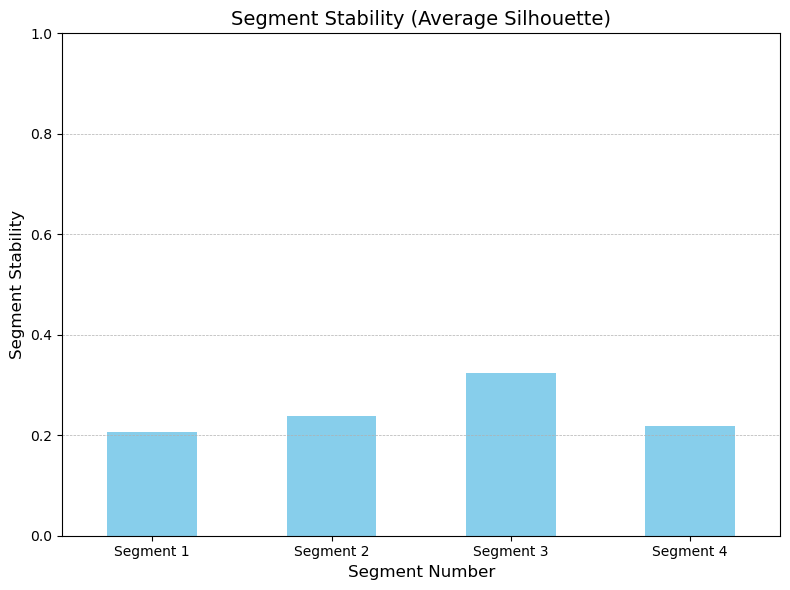

In [20]:
# Assuming MD_r4 is a DataFrame with columns:
#   "Cluster" (0-based cluster labels)
#   "Silhouette Score" (one score per observation)

# 1) Compute the average silhouette (stability) per cluster
avg_silhouette_by_cluster = MD_r4.groupby("Cluster")["Silhouette Score"].mean()

# 2) Rename index to be 1-based for readability
avg_silhouette_by_cluster.index = [f"Segment {i+1}" for i in avg_silhouette_by_cluster.index]

# 3) Plot the average silhouette scores (stability) as a bar chart
plt.figure(figsize=(8, 6))
avg_silhouette_by_cluster.plot(kind="bar", color="skyblue")
plt.ylim(0, 1)  # Matches ylim = 0:1 in R
plt.xlabel("Segment Number", fontsize=12)
plt.ylabel("Segment Stability", fontsize=12)
plt.title("Segment Stability (Average Silhouette)", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle="--", linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

### Using Mixtures of Distributions

   iter  converged  k  k0     logLik       AIC       BIC       ICL
0     6       True  2   2   7572.324 -14834.65 -14016.03 -14001.47
1     8       True  3   3  15968.554 -31471.11 -30240.54 -30218.70
2     7       True  4   4  21513.459 -42404.92 -40762.41 -40733.28
3     9       True  5   5  27715.807 -54657.06 -52602.60 -52566.19
4    12       True  6   6  22631.166 -44328.43 -41862.02 -41818.34
5     7       True  7   7  26813.818 -52537.70 -49659.34 -49608.37
6    12       True  8   8  29546.279 -57846.56 -54556.26 -54498.00


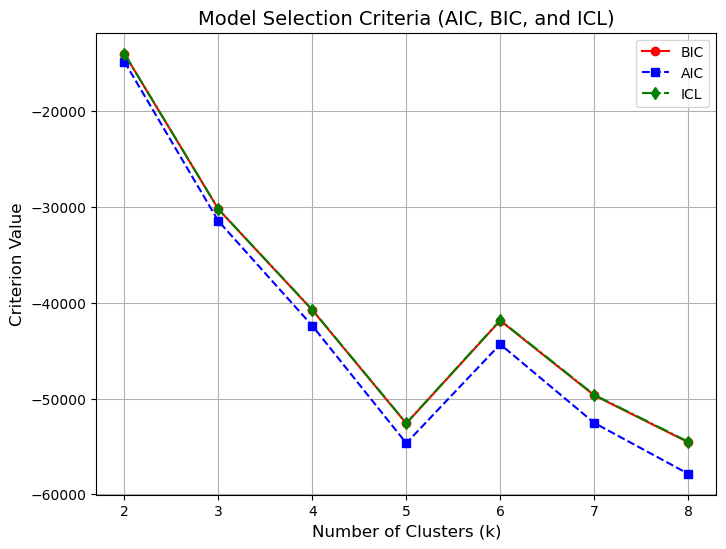

In [23]:
from sklearn.mixture import GaussianMixture


# Set random seed for reproducibility
np.random.seed(1234)

# Define the range of clusters (k=2 to 8)
k_range = range(2, 9)

# Store mixture model results
results = []

# Fit Gaussian Mixture Models for k = 2 to 8
for k in k_range:
    best_model = None
    best_bic = np.inf  # Lower BIC is better
    best_log_lik = -np.inf
    
    for _ in range(10):  # 10 repetitions to find best model
        gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=np.random.randint(10000), max_iter=200)
        gmm.fit(MD_x)
        
        # Get log-likelihood and BIC for the model
        log_lik = gmm.lower_bound_ * MD_x.shape[0]  # Log-likelihood (scaled by number of samples)
        bic = gmm.bic(MD_x)
        aic = gmm.aic(MD_x)
        icl = bic + (np.log(MD_x.shape[0]) * k)  # Approximate ICL (BIC with entropy penalty)

        # Select the model with the lowest BIC
        if bic < best_bic:
            best_bic = bic
            best_log_lik = log_lik
            best_model = gmm
            best_aic = aic
            best_icl = icl

    # Store model results
    results.append({
        "iter": best_model.n_iter_,
        "converged": best_model.converged_,
        "k": k,
        "k0": k,  # In flexmix, k0 is usually the same as k
        "logLik": best_log_lik,
        "AIC": best_aic,
        "BIC": best_bic,
        "ICL": best_icl  # Storing computed ICL value
    })

# Convert results to DataFrame for display
results_df = pd.DataFrame(results)

# Format numerical values for readability
results_df["logLik"] = results_df["logLik"].round(3)
results_df["AIC"] = results_df["AIC"].round(2)
results_df["BIC"] = results_df["BIC"].round(2)
results_df["ICL"] = results_df["ICL"].round(2)

# Display the results
print(results_df)

# Plot BIC, AIC, and ICL for visualization
plt.figure(figsize=(8, 6))
plt.plot(results_df["k"], results_df["BIC"], marker='o', linestyle='-', label='BIC', color='red')
plt.plot(results_df["k"], results_df["AIC"], marker='s', linestyle='--', label='AIC', color='blue')
plt.plot(results_df["k"], results_df["ICL"], marker='d', linestyle='-.', label='ICL', color='green')
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Criterion Value", fontsize=12)
plt.title("Model Selection Criteria (AIC, BIC, and ICL)", fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [24]:
# Extract k=4 mixture model from stored models
MD_m4 = mixture_models[4]  # Extract best Gaussian Mixture Model for k=4

# Get cluster assignments for k-means (previously computed)
kmeans_clusters = kmeans_4.labels_

# Get cluster assignments for the mixture model
mixture_clusters = MD_m4.predict(MD_x)

# Create a contingency table comparing k-means and mixture model clusters
contingency_table = pd.crosstab(kmeans_clusters, mixture_clusters, rownames=['K-Means Clusters'], colnames=['Mixture Model Clusters'])

# Display the contingency table
print("Contingency Table (K-Means vs Mixture Model Clusters):")
print(contingency_table)

Contingency Table (K-Means vs Mixture Model Clusters):
Mixture Model Clusters   0    1    2    3
K-Means Clusters                         
0                       31   31    0  305
1                       17  207    0   13
2                       45   12  430   46
3                       43   71  192   10


In [25]:
# Use k-means clusters as initial clusters for the mixture model
initial_clusters = kmeans_4.labels_

# Fit a new Gaussian Mixture Model (GMM) using k-means assignments as initial labels
MD_m4a = GaussianMixture(n_components=4, covariance_type='full', random_state=1234, max_iter=200)
MD_m4a.fit(MD_x, initial_clusters)

# Get cluster assignments for the new mixture model
mixture_clusters_m4a = MD_m4a.predict(MD_x)

# Create a contingency table comparing k-means and mixture model clusters
contingency_table_m4a = pd.crosstab(initial_clusters, mixture_clusters_m4a, rownames=['K-Means Clusters'], colnames=['Mixture Model Clusters'])

# Display the contingency table
print("Contingency Table (K-Means vs New Mixture Model Clusters):")
print(contingency_table_m4a)

Contingency Table (K-Means vs New Mixture Model Clusters):
Mixture Model Clusters    0    1    2    3
K-Means Clusters                          
0                        86    8  266    7
1                         0  208   24    5
2                       466    0    5   62
3                         0   38    2  276


In [26]:
# Use k-means clusters as initial labels
initial_clusters = kmeans_4.labels_

# Fit a new Gaussian Mixture Model (GMM) using k-means assignments as initialization
MD_m4a = GaussianMixture(n_components=4, covariance_type='full', random_state=1234, max_iter=200)
MD_m4a.fit(MD_x, initial_clusters)

# Compute log-likelihood of the fitted mixture model
log_likelihood_m4a = MD_m4a.lower_bound_ * MD_x.shape[0]  # Scale by number of samples

# Display log-likelihood
print(f"Log-Likelihood of MD_m4a: {log_likelihood_m4a:.4f}")

Log-Likelihood of MD_m4a: 16082.8862


In [27]:
# Extract k=4 mixture model from stored models
MD_m4 = mixture_models[4]  # Best Gaussian Mixture Model for k=4

# Compute log-likelihood of the mixture model
log_likelihood_m4 = MD_m4.lower_bound_ * MD_x.shape[0]  # Scale by number of samples

# Display log-likelihood
print(f"Log-Likelihood of MD_m4: {log_likelihood_m4:.4f}")

Log-Likelihood of MD_m4: 21513.4588


### Using Mixtures of Regression Models

In [28]:
# Count occurrences of each unique value in the 'Like' column
like_counts = mcdonalds["Like"].value_counts()

# Reverse the order of the counts
like_counts = like_counts[::-1]

# Display the reversed counts
print(like_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [29]:
# Convert 'Like' column to numeric (assuming it is categorical)
mcdonalds["Like.n"] = 6 - pd.to_numeric(mcdonalds["Like"], errors="coerce")

# Count occurrences of each unique value in 'Like.n'
like_n_counts = mcdonalds["Like.n"].value_counts().sort_index()

# Display the table
print(like_n_counts)

Like.n
2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: count, dtype: int64


In [30]:
import patsy

# Create a formula using the first 11 columns
formula_str = "Like.n ~ " + " + ".join(mcdonalds.columns[:11])

# Convert string to a formula object using patsy
formula = patsy.ModelDesc.from_formula(formula_str)

# Display the formula
print("Generated Formula:", formula_str)

Generated Formula: Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


/var/folders/wx/2q3k_n_948z25v22yh31_1dm0000gn/T/ipykernel_56392/1964352349.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)


Refitted Mixture Model Summary:
           const     yummy  convenient     spicy  fattening    greasy  \
Cluster 1    1.0  0.609473    0.895442  0.000000   0.871314  0.517426   
Cluster 2    1.0  0.362275    0.949102  0.407186   0.853293  0.556886   

               fast    cheap     tasty  expensive   healthy  disgusting  \
Cluster 1  0.900804  0.60143  0.609473   0.352994  0.193923    0.247542   
Cluster 2  0.898204  0.58982  0.760479   0.374251  0.215569    0.227545   

             Like.n  
Cluster 1  4.409294  
Cluster 2  5.164671  


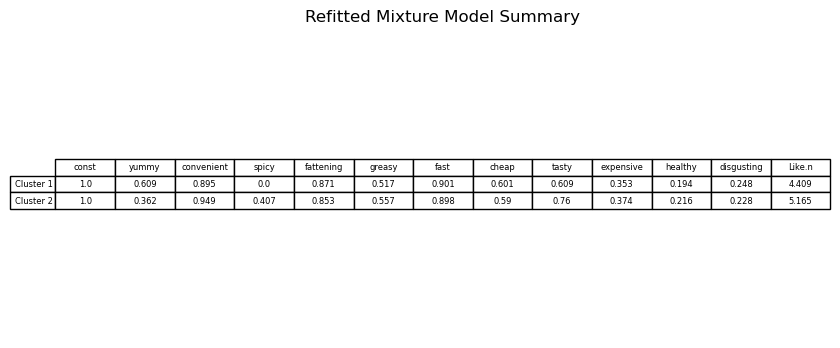

In [35]:
from sklearn.impute import SimpleImputer

# Set random seed for reproducibility
np.random.seed(1234)

# Convert categorical columns (first 11) to binary (0/1)
X = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)  

# Create 'Like.n' column (transformed response variable)
mcdonalds["Like.n"] = 6 - pd.to_numeric(mcdonalds["Like"], errors="coerce")  

# Target variable (dependent variable)
y = pd.to_numeric(mcdonalds["Like.n"], errors="coerce")  

# Handle missing values using imputation
imputer = SimpleImputer(strategy="most_frequent")  
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)  
y = pd.Series(imputer.fit_transform(y.values.reshape(-1, 1)).flatten())  

# Add a constant for intercept
X = sm.add_constant(X)

k = 2

# Fit Gaussian Mixture Regression Model again (refit)
MD_ref2 = GaussianMixture(n_components=k, covariance_type='full', random_state=1234, max_iter=200)
MD_ref2.fit(np.column_stack((X, y)))

# Get cluster assignments
cluster_assignments = MD_ref2.predict(np.column_stack((X, y)))

# Compute mean regression coefficients for each cluster
cluster_means = []
for cluster in range(k):
    cluster_data = np.column_stack((X, y))[cluster_assignments == cluster]  # Select data for this cluster
    if len(cluster_data) > 0:
        cluster_means.append(cluster_data.mean(axis=0))  # Compute mean of features in this cluster

# Convert results to a DataFrame for better readability
columns = list(X.columns) + ["Like.n"]  # Include dependent variable name
summary_df = pd.DataFrame(cluster_means, columns=columns)
summary_df.index = [f"Cluster {i+1}" for i in range(k)]

# Print the summary DataFrame
print("Refitted Mixture Model Summary:")
print(summary_df)

# Optionally, save the summary as a CSV file
summary_df.to_csv("refitted_mixture_model_summary.csv", index=True)

# Display as a table using matplotlib
plt.figure(figsize=(10, 4))
plt.table(cellText=summary_df.round(3).values, 
          colLabels=summary_df.columns, 
          rowLabels=summary_df.index,
          loc="center", cellLoc="center")
plt.axis("off")
plt.title("Refitted Mixture Model Summary")
plt.show()

/var/folders/wx/2q3k_n_948z25v22yh31_1dm0000gn/T/ipykernel_56392/24073991.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)


<Figure size 1200x600 with 0 Axes>

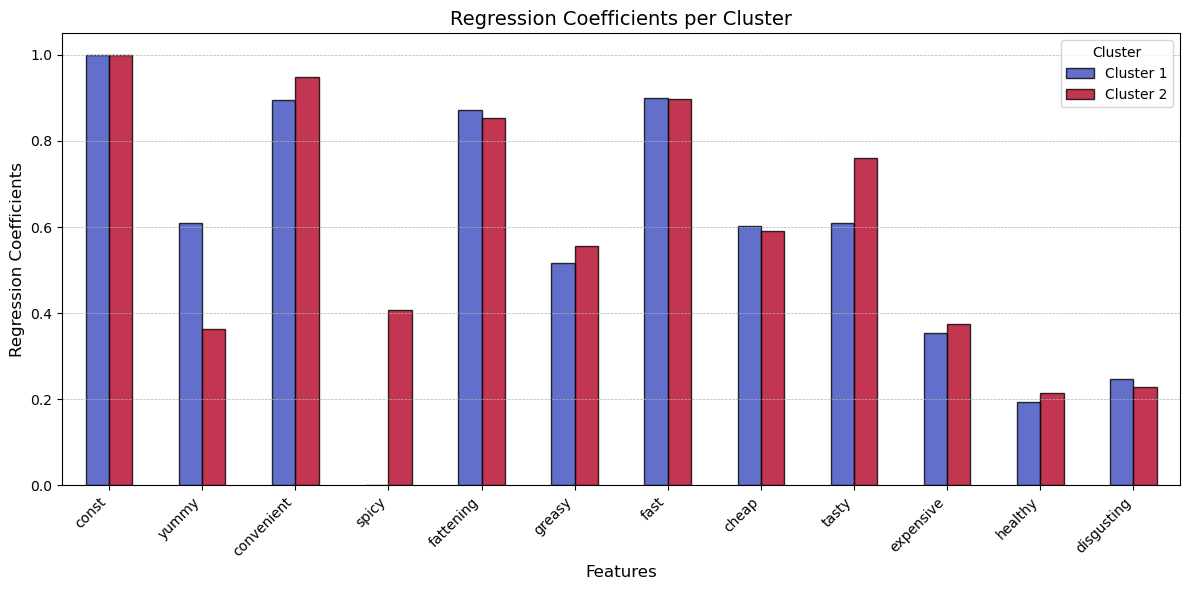

In [36]:
# Set random seed for reproducibility
np.random.seed(1234)

# Convert categorical columns (first 11) to binary (0/1)
X = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)  

# Create 'Like.n' column (transformed response variable)
mcdonalds["Like.n"] = 6 - pd.to_numeric(mcdonalds["Like"], errors="coerce")  

# Target variable (dependent variable)
y = pd.to_numeric(mcdonalds["Like.n"], errors="coerce")  

# Handle missing values using imputation
imputer = SimpleImputer(strategy="most_frequent")  
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)  
y = pd.Series(imputer.fit_transform(y.values.reshape(-1, 1)).flatten())  

# Add a constant for intercept
X = sm.add_constant(X)

# Define number of clusters
k = 2

# Fit Gaussian Mixture Regression Model again (refit)
MD_ref2 = GaussianMixture(n_components=k, covariance_type='full', random_state=1234, max_iter=200)
MD_ref2.fit(np.column_stack((X, y)))

# Get cluster assignments
cluster_assignments = MD_ref2.predict(np.column_stack((X, y)))

# Compute mean regression coefficients for each cluster
cluster_means = []
columns = list(X.columns) + ["Like.n"]  # Include dependent variable name

for cluster in range(k):
    cluster_data = np.column_stack((X, y))[cluster_assignments == cluster]  # Select data for this cluster
    if len(cluster_data) > 0:
        cluster_means.append(cluster_data.mean(axis=0))  # Compute mean of features in this cluster

# Convert results to a DataFrame for better readability
summary_df = pd.DataFrame(cluster_means, columns=columns)
summary_df.index = [f"Cluster {i+1}" for i in range(k)]

# Compute the mean regression coefficients per cluster
coefficients = summary_df.drop(columns=["Like.n"]).T  # Transpose for better plotting

# Plot regression coefficients for each cluster
plt.figure(figsize=(12, 6))
coefficients.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", alpha=0.8, edgecolor="black")

plt.xlabel("Features", fontsize=12)
plt.ylabel("Regression Coefficients", fontsize=12)
plt.title("Regression Coefficients per Cluster", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Cluster", fontsize=10)
plt.grid(axis='y', linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()

## Profiling Segments

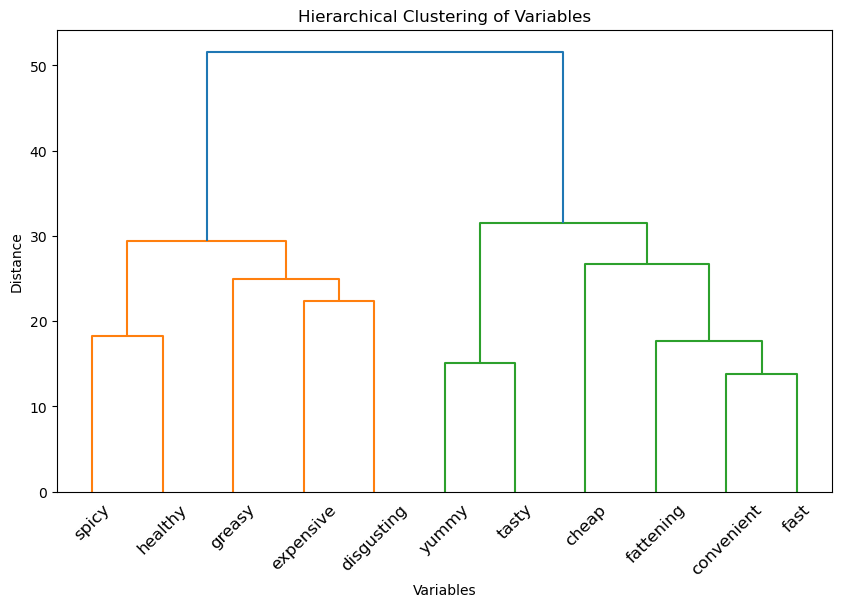

In [38]:
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd


# Compute the distance matrix between variables (columns)
distance_matrix = ssd.pdist(MD_x.T, metric="euclidean")  # Pairwise Euclidean distance between variables

# Convert distance matrix to a condensed format
linkage_matrix = sch.linkage(distance_matrix, method="ward")  # Perform hierarchical clustering

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(linkage_matrix, labels=MD_x.columns, leaf_rotation=45)
plt.title("Hierarchical Clustering of Variables")
plt.xlabel("Variables")
plt.ylabel("Distance")
plt.show()

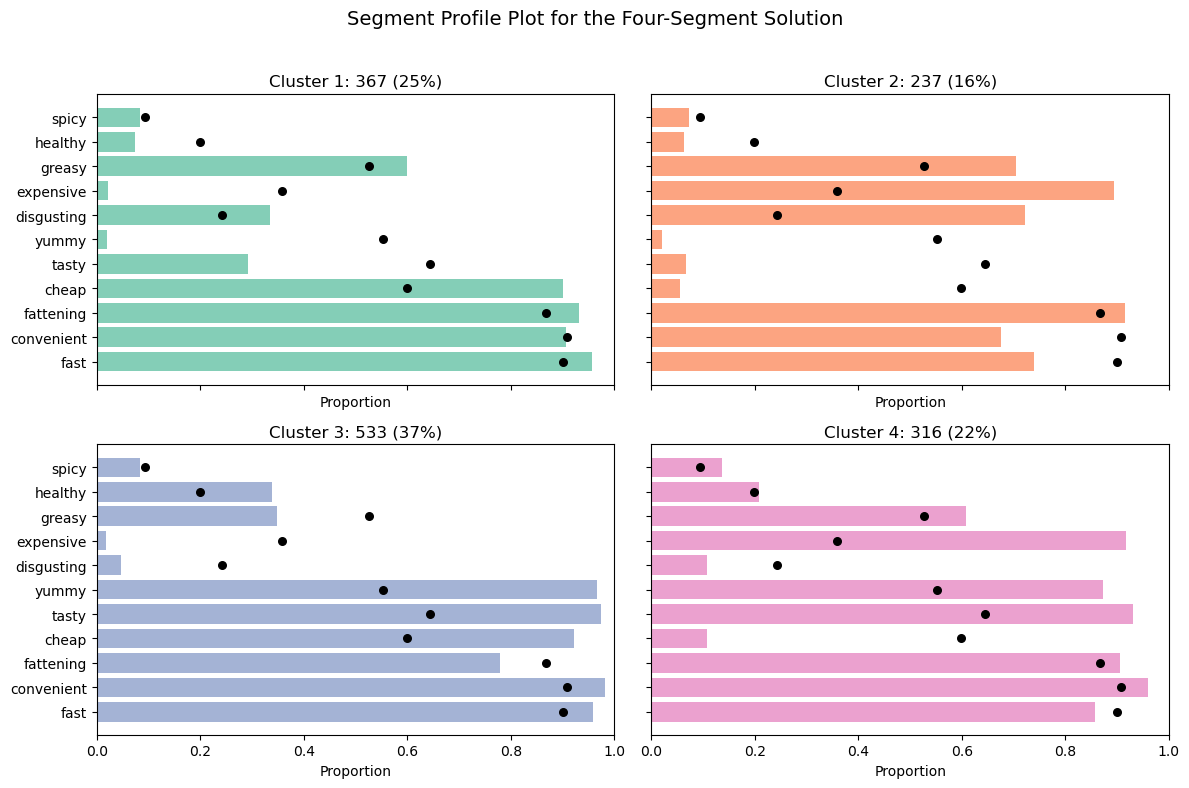

In [39]:
# Compute hierarchical clustering of variables (columns)
distance_matrix = ssd.pdist(MD_x.T, metric="euclidean")  # Pairwise Euclidean distance between variables
linkage_matrix = sch.linkage(distance_matrix, method="ward")  # Perform hierarchical clustering

# Extract the order of variables from hierarchical clustering (similar to MD.vclust$order in R)
variable_order = sch.leaves_list(linkage_matrix)[::-1]  # Reverse order to match rev(MD.vclust$order)

# Reorder the dataset based on the clustering order
MD_x_ordered = MD_x.iloc[:, variable_order]

# Compute mean values for each cluster in MD.k4
cluster_means = []
cluster_sizes = []

for cluster in np.unique(cluster_labels_k4):  # Assuming k-means cluster assignments exist as cluster_labels_k4
    cluster_means.append(MD_x_ordered[cluster_labels_k4 == cluster].mean())
    cluster_sizes.append((cluster_labels_k4 == cluster).sum())

# Convert to DataFrame for visualization
cluster_means_df = pd.DataFrame(cluster_means, index=[f"Cluster {i+1}: {size} ({size/len(cluster_labels_k4)*100:.0f}%)"
                                                      for i, size in enumerate(cluster_sizes)]).T

# Set up a 2x2 grid for bar charts (assuming 4 clusters)
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle("Segment Profile Plot for the Four-Segment Solution", fontsize=14)

# Iterate through clusters and create bar plots
for i, (ax, cluster) in enumerate(zip(axes.flatten(), cluster_means_df.columns)):
    means = cluster_means_df[cluster]
    
    # Create horizontal bar chart
    ax.barh(cluster_means_df.index, means, color=sns.color_palette("Set2")[i], alpha=0.8)
    
    # Add reference points (e.g., overall mean)
    overall_means = MD_x_ordered.mean()
    ax.scatter(overall_means, range(len(overall_means)), color="black", zorder=3, s=30)
    
    # Titles and labels
    ax.set_title(cluster, fontsize=12)
    ax.set_xlim(0, 1)
    ax.set_xlabel("Proportion")
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

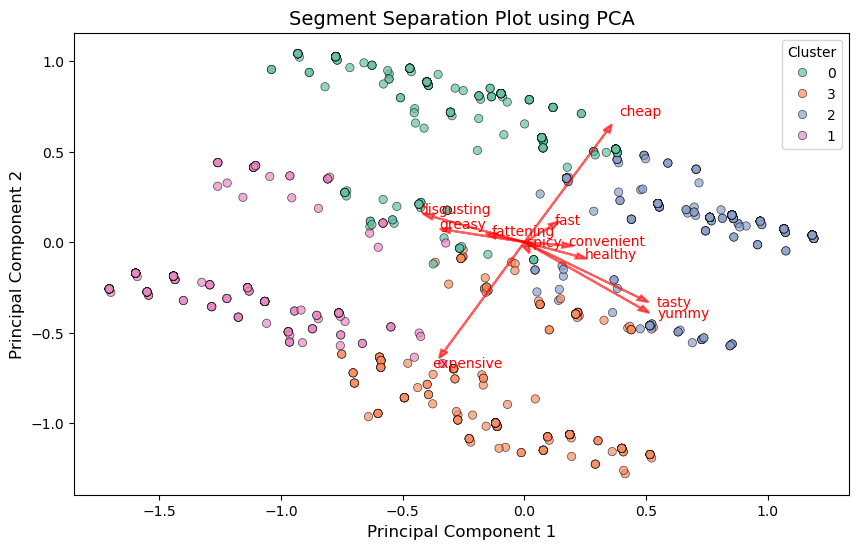

In [40]:
# Perform PCA on MD.x (Assuming MD_x is already preprocessed binary data)
pca = PCA(n_components=2)
MD_pca_proj = pca.fit_transform(MD_x)

# Extract cluster labels from k-means (assuming cluster_labels_k4 exists)
clusters = cluster_labels_k4

# Convert PCA results into a DataFrame for visualization
pca_df = pd.DataFrame(MD_pca_proj, columns=["PC1", "PC2"])
pca_df["Cluster"] = clusters

# Get feature contributions to PCs (Projection Axes equivalent in R)
feature_vectors = pca.components_.T

# Plot PCA projection of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue=pca_df["Cluster"].astype(str), palette="Set2", alpha=0.7, edgecolor="black")

# Add projection axes (feature vectors) as arrows
for i, feature in enumerate(MD_x.columns):
    plt.arrow(0, 0, feature_vectors[i, 0], feature_vectors[i, 1], color="red", alpha=0.6, head_width=0.03, linewidth=1.5)
    plt.text(feature_vectors[i, 0] * 1.15, feature_vectors[i, 1] * 1.15, feature, color="red", fontsize=10)

# Customize plot appearance
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.title("Segment Separation Plot using PCA", fontsize=14)
plt.legend(title="Cluster")

# Show plot
plt.show()

## Describing Segments

<Figure size 1000x600 with 0 Axes>

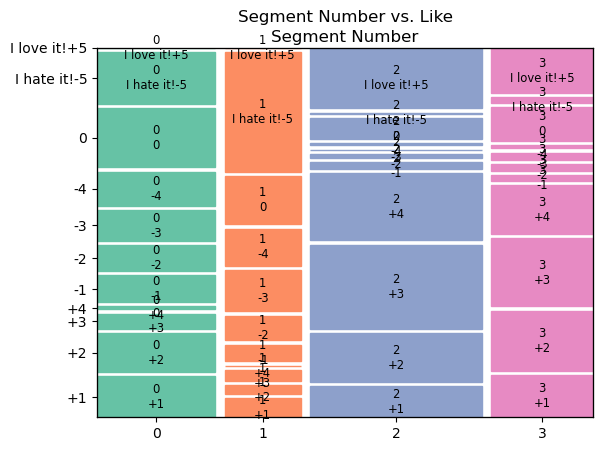

In [41]:
from statsmodels.graphics.mosaicplot import mosaic

# Extract cluster assignments from k-means
k4 = pd.Series(cluster_labels_k4, name="Segment")  # Assuming k-means assignments exist

# Create a contingency table between clusters and 'Like' variable
contingency_table = pd.crosstab(k4, mcdonalds["Like"])

# Function to assign colors to segments
def properties(key):
    return {'color': sns.color_palette("Set2")[int(key[0]) % len(sns.color_palette("Set2"))]}

# Plot mosaic plot
plt.figure(figsize=(10, 6))
mosaic(contingency_table.stack(), gap=0.02, title="Segment Number vs. Like", properties=properties)

# Customize plot appearance
plt.xlabel("Segment Number", fontsize=12)
plt.ylabel("Like Responses", fontsize=12)
plt.show()

<Figure size 1000x600 with 0 Axes>

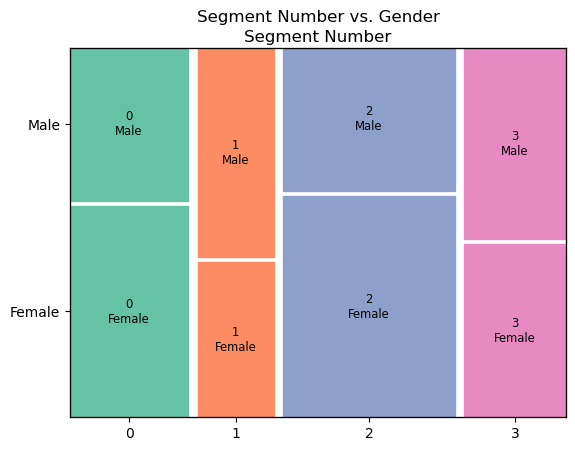

In [42]:
# Create a contingency table between clusters and 'Gender' variable
contingency_table_gender = pd.crosstab(k4, mcdonalds["Gender"])

# Function to assign colors to segments
def properties_gender(key):
    return {'color': sns.color_palette("Set2")[int(key[0]) % len(sns.color_palette("Set2"))]}

# Plot mosaic plot for Gender distribution across clusters
plt.figure(figsize=(10, 6))
mosaic(contingency_table_gender.stack(), gap=0.02, title="Segment Number vs. Gender", properties=properties_gender)

# Customize plot appearance
plt.xlabel("Segment Number", fontsize=12)
plt.ylabel("Gender Distribution", fontsize=12)
plt.show()

/var/folders/wx/2q3k_n_948z25v22yh31_1dm0000gn/T/ipykernel_56392/545201015.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Age", data=age_cluster_df, notch=True, width=0.6, palette="Set2", showmeans=True)


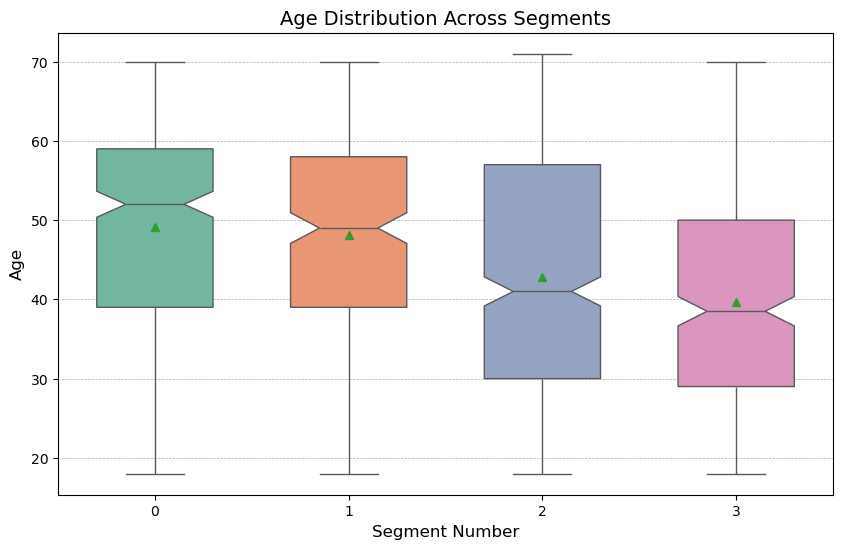

In [43]:
# Convert cluster labels into a DataFrame
k4_series = pd.Series(k4, name="Cluster")

# Create a DataFrame for plotting
age_cluster_df = pd.concat([mcdonalds["Age"], k4_series], axis=1)

# Create a box plot for Age distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Age", data=age_cluster_df, notch=True, width=0.6, palette="Set2", showmeans=True)

# Customize plot appearance
plt.xlabel("Segment Number", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.title("Age Distribution Across Segments", fontsize=14)
plt.grid(axis="y", linestyle="--", linewidth=0.5)

# Show plot
plt.show()

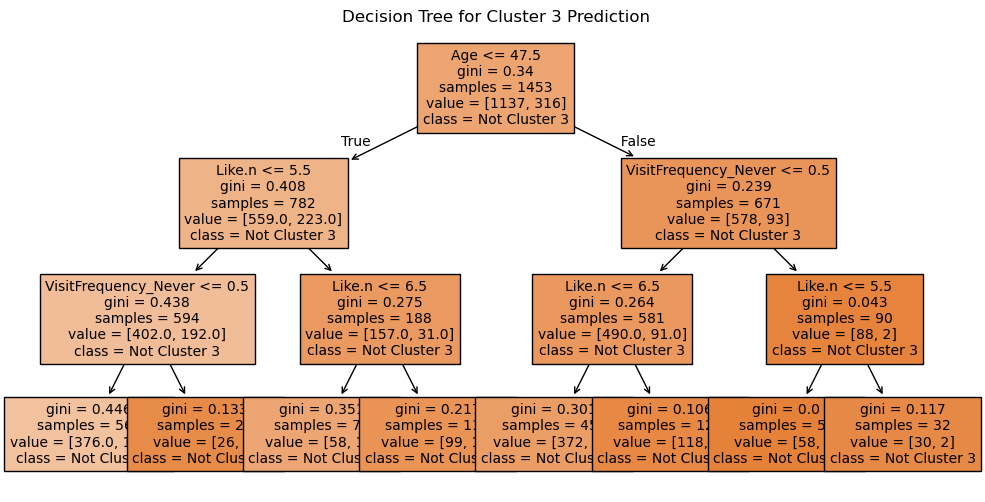

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer

# Prepare the dataset for decision tree classification
# Binary classification: Cluster 3 vs. all others
y_tree = (k4 == 3).astype(int)  # Convert to binary outcome (True = 1, False = 0)

# Select predictor variables (independent variables)
X_tree = mcdonalds[["Like.n", "Age", "VisitFrequency", "Gender"]].copy()

# Convert categorical variables to numerical
X_tree = pd.get_dummies(X_tree, drop_first=True)  # One-hot encoding for categorical variables

# Handle missing values using imputation
imputer = SimpleImputer(strategy="most_frequent")  
X_tree = pd.DataFrame(imputer.fit_transform(X_tree), columns=X_tree.columns)  

# Train a decision tree classifier
tree_model = DecisionTreeClassifier(max_depth=3, random_state=1234)  # Limit depth for interpretability
tree_model.fit(X_tree, y_tree)

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X_tree.columns, class_names=["Not Cluster 3", "Cluster 3"], filled=True, fontsize=10)
plt.title("Decision Tree for Cluster 3 Prediction")
plt.show()

## Selecting (the) Target Segment(s)

In [45]:
# Define mapping for categorical frequency levels to numeric values
visit_frequency_mapping = {
    "Never": 0,
    "Once a year": 1,
    "Every three months": 2,
    "Once a month": 3,
    "Once a week": 4,
    "More than once a week": 5
}

# Convert VisitFrequency to numeric values using the defined mapping
mcdonalds["VisitFrequency_numeric"] = mcdonalds["VisitFrequency"].map(visit_frequency_mapping)

# Compute the mean visit frequency per cluster
visit = mcdonalds.groupby(k4)["VisitFrequency_numeric"].mean()

# Display the result
print("Mean Visit Frequency per Segment:")
print(visit)

Mean Visit Frequency per Segment:
Segment
0    1.700272
1    1.417722
2    3.000000
3    2.860759
Name: VisitFrequency_numeric, dtype: float64


In [46]:
# Compute the mean 'Like.n' value per cluster
like = mcdonalds.groupby(k4)["Like.n"].mean()

# Display the result
print("Mean Like Score per Segment:")
print(like)


Mean Like Score per Segment:
Segment
0    6.478964
1    7.306667
2    3.625000
3    4.157303
Name: Like.n, dtype: float64


In [47]:
# Compute the mean 'Like.n' value per cluster
like = mcdonalds.groupby(k4)["Like.n"].mean()

# Compute the proportion of females per cluster
female = mcdonalds.groupby(k4)["Gender"].apply(lambda x: (x == "Female").mean())

# Display the results
print("Mean Like Score per Segment:")
print(like)
print("\nProportion of Females per Segment:")
print(female)

Mean Like Score per Segment:
Segment
0    6.478964
1    7.306667
2    3.625000
3    4.157303
Name: Like.n, dtype: float64

Proportion of Females per Segment:
Segment
0    0.580381
1    0.426160
2    0.607880
3    0.474684
Name: Gender, dtype: float64


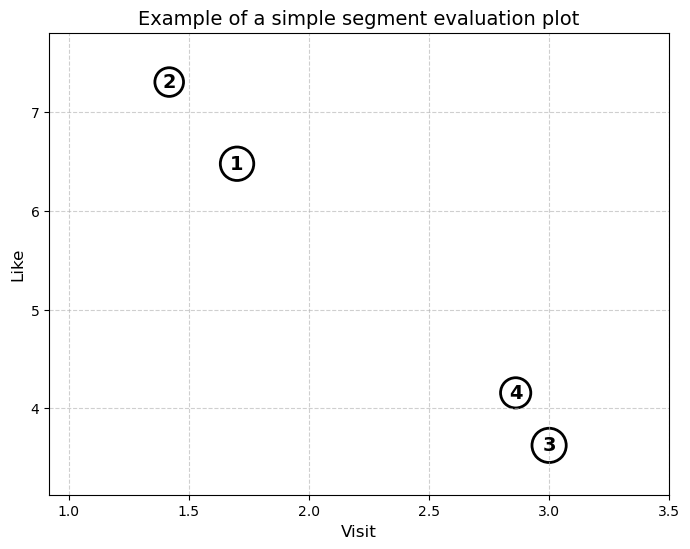

In [59]:
# Define segment labels
segments = range(1, len(visit) + 1)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(visit, like, s=1000 * female, facecolors='none', edgecolors='black', linewidth=2)

# Annotate segment numbers
for i, (x, y) in enumerate(zip(visit, like)):
    plt.text(x, y, str(segments[i]), fontsize=14, ha='center', va='center', fontweight='bold')

# Dynamically set plot limits based on data range
plt.xlim(min(visit) - 0.5, max(visit) + 0.5)  # Adjust x-axis limits
plt.ylim(min(like) - 0.5, max(like) + 0.5)    # Adjust y-axis limits

# Customize plot
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.title("Example of a simple segment evaluation plot", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

##  Customising the Marketing Mix

## Evaluation and Monitoring